based on https://stackoverflow.com/questions/24671901/does-there-exist-a-way-to-directly-figure-out-the-smoothness-of-a-digital-imag - actually measures roughness rather than smoothness using the laplacian (2nd spatial derivative)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import nibabel as nib
import os
import ants
import nilearn.plotting

In [6]:
warpimgfile = '/var/folders/c4/hpq2bp2913j7jb77b6v5b7qh0000gn/T/tmp033gc36t1Warp.nii.gz'
basedir = '/Users/poldrack/data_unsynced/brainsss/ants_example_data'
meanimgfile = os.path.join(basedir, 'series-tdtomato_size-um_units-mm_mean.nii')

warpimg_ants = ants.image_read(warpimgfile)
meanimg_ants = ants.image_read(meanimg)

In [7]:
jacob = ants.create_jacobian_determinant_image(meanimg_ants, 
       warpimg_ants).to_nibabel()

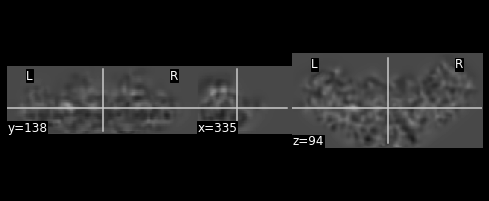

In [9]:
nilearn.plotting.plot_anat(jacob)

In [28]:
# get smoothness

# first compute jacobian determinant to quantify deformation
jacob_data = jacob.get_fdata()
jacob_data = jacob_data / np.max(jacob_data)

# then compute laplacian to quantify roughness of deformation
laplacian = ndi.laplace(jacob_data)

#print np.average(np.absolute(ndi.filters.laplace(ndi.imread(path).astype(float) / 255.0)))

In [29]:
np.average(np.absolute(laplacian))

0.004659722515204674

In [31]:
# make smoothed version

smoothed = ndi.gaussian_filter(jacob_data, 2)
laplacian = ndi.laplace(smoothed)
# drop voxels with 
np.average(np.absolute(laplacian))

0.0014423246784298531